BloomTech Data Science

*Unit 2, Sprint 1, Module 2*

---

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'

# Module Project: Regression II

In this project, you'll continue working with the New York City rent dataset you used in the last module project.

## Directions

The tasks for this project are as follows:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two new features.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `Linearregression` model.
- **Task 7:** Calculate the training and test mean absolute error for your model.
- **Task 8:** Calculate the training and test $R^2$ score for your model.
- **Stretch Goal:** Determine the three most important features for your linear regression model.

**Note**

You should limit yourself to the following libraries for this project:

- `matplotlib`
- `numpy`
- `pandas`
- `sklearn`

In [ ]:
#import block
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# I. Wrangle Data

In [ ]:
def wrangle(filepath):
    df = pd.read_csv(filepath, index_col='created', parse_dates=True, infer_datetime_format=True)
    df.dropna(inplace=True)
    
    # Remove the most extreme 1% prices,
    # the most extreme .1% latitudes, &
    # the most extreme .1% longitudes
    df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
            (df['price'] <= np.percentile(df['price'], 99.5)) & 
            (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
            (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
            (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
            (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

    # Engineer new features
    #total rooms
    df['rooms'] = df['bathrooms'] + df['bedrooms']
    #perk features with corr > .1
    df['perks'] = df['elevator'] + df['dishwasher'] + df['doorman'] + df['fitness_center'] + df['laundry_in_unit'] + df['dining_room']

    
    return df

filepath = DATA_PATH + 'apartments/renthop-nyc.csv'

**Task 1:** Add the following functionality to the above `wrangle` function.

- The `'created'` column will parsed as a `DateTime` object and set as the `index` of the DataFrame. 
- Rows with `NaN` values will be dropped.

Then use your modified function to import the `renthop-nyc.csv` file into a DataFrame named `df`.

In [ ]:
df = wrangle(filepath)
df.head()
#df.shape

,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,...,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,rooms,perks
created,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,...,0,0,0,0,0,0,0,0,4.5,0
2016-06-12 12:19:27,1.0,2,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,...,0,0,0,0,0,0,0,0,3.0,3
2016-04-17 03:26:41,1.0,1,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,...,0,0,0,0,0,0,0,0,2.0,1
2016-04-18 02:22:02,1.0,1,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,...,0,0,0,0,0,0,0,0,2.0,0
2016-04-28 01:32:41,1.0,4,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,...,0,0,0,0,0,0,0,0,5.0,0


**Task 2:** Using your `pandas` and dataviz skills decide on two features that you want to engineer for your dataset. Next, modify your `wrangle` function to add those features. 

**Note:** You can learn more about feature engineering [here](https://en.wikipedia.org/wiki/Feature_engineering). Here are some ideas for new features:

- Does the apartment have a description?
- Length of description.
- Total number of perks that apartment has.
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths).

'import seaborn as sns\nplt.figure(figsize=(25,25))\ncor = df.corr()\nsns.heatmap(cor, annot=True, cmap=plt.cm.Reds)\nplt.show()'

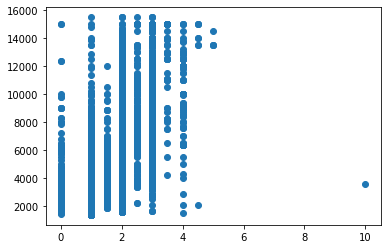

In [ ]:
# Conduct your exploratory data analysis here, 
# and then modify the function above.
plt.scatter(df['cats_allowed'], df['price'])
plt.scatter(df['dogs_allowed'], df['price'])
plt.clf()
plt.scatter(df['bathrooms'], df['price'])
"""import seaborn as sns
plt.figure(figsize=(25,25))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()"""

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'price'`.

**Note:** In contrast to the last module project, this time you should include _all_ the numerical features in your dataset.

In [ ]:
X = df.select_dtypes(include=np.number) #all numeric types
X = X.drop(columns='price') #exclude target
y = df['price']

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from April and May 2016. 
- Your test set should include data from June 2016.

In [ ]:
datemask = (X.index < pd.Timestamp("2016-06"))
X_train, y_train = X.loc[datemask], y.loc[datemask]
X_test, y_test = X.loc[~datemask], y.loc[~datemask] 

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model. First, calculate the mean of `y_train`. Next, create a list `y_pred` that has the same length as `y_train` and where every item in the list is the mean. Finally, use `mean_absolute_error` to calculate your baseline.

In [ ]:
y_mean = y_train.mean()
print(y_mean)
y_pred = pd.Series(y_mean, y_train.index) 
#print(y_pred)
baseline_mae = mean_absolute_error(y_train, y_pred)
print('Baseline MAE:', baseline_mae)

3573.2410569369604
Baseline MAE: 1202.398300781848


# IV. Build Model

**Task 6:** Build and train a `LinearRegression` model named `model` using your feature matrix `X_train` and your target vector `y_train`.

In [ ]:
# Step 1: Import predictor class

#imported above in import block: LinearRegression

# Step 2: Instantiate predictor
model = LinearRegression()

# Step 3: Fit predictor on the (training) data
model.fit(X_train, y_train)

print(model.intercept_)
print(model.coef_)

-1069293.0853121146
[-1.60278650e+15 -1.60278650e+15  1.61071416e+03 -1.35743629e+04
 -8.94799295e+01 -4.09767984e+01 -2.03922120e+02  9.31448235e+01
  2.59365986e+02 -1.64356838e+02 -1.62516081e+02 -2.58079855e+02
 -8.72343225e+01 -6.54524849e+01  2.79629448e+02 -1.62536806e+02
 -1.09964758e+02  2.53593750e+01 -3.35957031e+02 -4.78222656e+01
  6.13535156e+01 -1.34978516e+02  1.81626953e+02  1.53590088e+02
  1.15221558e+02 -4.58671875e+01  1.89716797e+02 -7.98543701e+01
  1.60278650e+15  2.21093750e+02]


# V. Check Metrics

**Task 7:** Calculate the training and test mean absolute error for your model.

In [ ]:
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))

print('Training MAE:', training_mae)
print('Test MAE:', test_mae)

Training MAE: 692.6674666069163
Test MAE: 701.2363700177783


**Task 8:** Calculate the training and test $R^2$ score for your model.

In [ ]:
training_r2 = r2_score(y_train, model.predict(X_train))
test_r2 = r2_score(y_test, model.predict(X_test))

#alternate method: model.score(X, y) 

print('Training MAE:', training_r2)
print('Test MAE:', test_r2)

Training MAE: 0.6163414426544156
Test MAE: 0.626402655156058


# VI. Communicate Results

**Stretch Goal:** What are the three most influential coefficients in your linear model? You should consider the _absolute value_ of each coefficient, so that it doesn't matter if it's positive or negative.

In [ ]:
sorted(zip(abs(model.coef_), X.columns), reverse=True)[:3]

[(1602786495899704.5, 'rooms'),
 (1602786495899223.8, 'bedrooms'),
 (1602786495897939.5, 'bathrooms')]